#2. Clustering:

a. Visualize and pre-process the data as appropriate from the file DataClustering.csv. You might have to use a power, an exponential, or a log transformation. 

b. Train k-means, and find the appropriate number of k. 

c. Using the cluster assignment as the label, visualize the t-sne embedding.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # mounting gdrive with colab

Mounted at /content/drive


## Import Libraries

In [ ]:
import pandas as pd               # for reading csv files
import numpy as np                # for array operations
import matplotlib.pyplot as plt   # for plotting charts
import seaborn as sns             # for plotting heatmaps

## Import Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataAssignment3/DataClustering.csv') # provide the path of the csv file from gdrive
df

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


## Exploratory Data Analysis

Let's analyse and visualize the csv file.

### Check shape of dataset

In [ ]:
df.shape # return the number of rows and columns of the dataset

(351, 4)

We can see that there are 351 instances and 4 attributes in the dataset.Next, we should take a look at the dataset to gain more insight about it.

### Preview the Dataset

In [ ]:
df.head() # returns the top 5 rows(default) of the dataset

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


### View Summary of Dataset

In [ ]:
df.info() # gives the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


### Check for missing values in dataset

In [ ]:
df.isnull().sum() # returns number of missing values

x1    0
x2    0
x3    0
x4    0
dtype: int64

Clearly there are no null values in the dataset and all the features are numerical variables (data type = float64) and no categorical variables.

### View the statistical summary of numerical variables

In [ ]:
df.describe() # gives statistical summary of dataset

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


We can see that all the columns are of different ranges and thus its important to transform all the features into same range. So we perform feature scaling.

## Feature Scaling



In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(df) #scales all features between 0 and 1.
X

array([[0.39413738, 0.55263609, 0.04846067, 0.10155864],
       [0.60722701, 0.59835618, 0.04372403, 0.06744783],
       [0.46685432, 0.41641091, 0.06927147, 0.15007126],
       ...,
       [0.02377336, 0.02486702, 0.04720233, 0.42726689],
       [0.03172506, 0.03455916, 0.05960323, 0.27529509],
       [0.03286911, 0.09748489, 0.07748231, 0.16835792]])

In [ ]:
df_scaled = pd.DataFrame(X,columns= list(df.columns)) # scaled dataset
df_scaled  

,x1,x2,x3,x4
0,0.394137,0.552636,0.048461,0.101559
1,0.607227,0.598356,0.043724,0.067448
2,0.466854,0.416411,0.069271,0.150071
3,0.485668,0.442824,0.067504,0.100287
4,0.499257,0.482481,0.040521,0.198586
...,...,...,...,...
346,0.078085,0.061217,0.195574,0.212692
347,0.090910,0.034783,0.027432,0.337638
348,0.023773,0.024867,0.047202,0.427267
349,0.031725,0.034559,0.059603,0.275295


Let.s see the statistical summary of scaled dataset.

In [ ]:
df_scaled.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.115772,0.175257,0.104023,0.166841
std,0.171709,0.210376,0.135969,0.128634
min,0.000000,0.000000,0.000000,0.000000
25%,0.031550,0.028091,0.036474,0.083449
50%,0.052692,0.048850,0.058348,0.127889
75%,0.082453,0.332512,0.096992,0.199072
max,1.000000,1.000000,1.000000,1.000000


Clearly all the values range between 0 and 1.

## KMeans Clustering

https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/#:~:text=Cluster%20analysis%20or%20clustering%20is,and%20low%20inter%2Dcluster%20similarity.

We will choose different cluster range and finding the optimum number of clusters using:

- Elbow method
- Silhouette method

### Optimum number of clusters using ELBOW method

Clusters : 2  Inertia : 21.303930363076418
Clusters : 3  Inertia : 15.737866554193985
Clusters : 4  Inertia : 11.28537861175116
Clusters : 5  Inertia : 8.301216800555146
Clusters : 6  Inertia : 7.007976005569766
Clusters : 7  Inertia : 6.03481106187338
Clusters : 8  Inertia : 5.255064615719425
Clusters : 9  Inertia : 4.557995240166795
Clusters : 10  Inertia : 4.082937783200337
Clusters : 11  Inertia : 3.7476457557095264
Clusters : 12  Inertia : 3.3677205941823094
Clusters : 13  Inertia : 3.1998925650117087
Clusters : 14  Inertia : 2.8272601308404806
Clusters : 15  Inertia : 2.6486247592566254



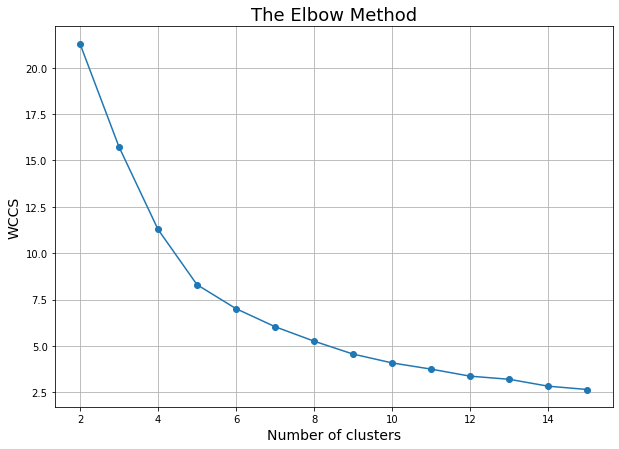

In [ ]:
from sklearn.cluster import KMeans

clusters_range = list(np.arange(2,16)) # different cluster range from 2 to 15
inertias=[]  # for storing the Within Clusters Sum of Squares (WCCS)

for c in clusters_range:

  kmeans=KMeans(init='k-means++',n_clusters=c,n_init=20, max_iter=500,random_state=123).fit(X) # initializing and fitting the model
  inertias.append(kmeans.inertia_) # appending the WCCS

for i in range(len(inertias)):
  print(f"Clusters : {clusters_range[i]}  Inertia : {inertias[i]}")
print()

# plotting the WCCS to find the optimum number of clusters
plt.figure(figsize=(10,7))
plt.plot(clusters_range,inertias,marker='o')
plt.title('The Elbow Method',fontsize="18")
plt.xlabel('Number of clusters',fontsize="14")
plt.ylabel('WCCS',fontsize="14")
plt.grid(True)
plt.show()


We can see that from more than 5 clusters, the WCCS is almost constant, so **5 clusters** is a good value of number of clusters.

### Optimum number of clusters using SILHOUETTE method

Clusters : 2   Silhouette score : 0.4832782946426441
Clusters : 3   Silhouette score : 0.4706419803579769
Clusters : 4   Silhouette score : 0.49038015748993563
Clusters : 5   Silhouette score : 0.4542284319314271
Clusters : 6   Silhouette score : 0.4575790501418605
Clusters : 7   Silhouette score : 0.4593528154227382
Clusters : 8   Silhouette score : 0.45131761683818294
Clusters : 9   Silhouette score : 0.41264222691825986
Clusters : 10   Silhouette score : 0.41679392180179753
Clusters : 11   Silhouette score : 0.4243861764460949
Clusters : 12   Silhouette score : 0.4258717790807869
Clusters : 13   Silhouette score : 0.39085643068261755
Clusters : 14   Silhouette score : 0.3967132991746819
Clusters : 15   Silhouette score : 0.3444165618062444



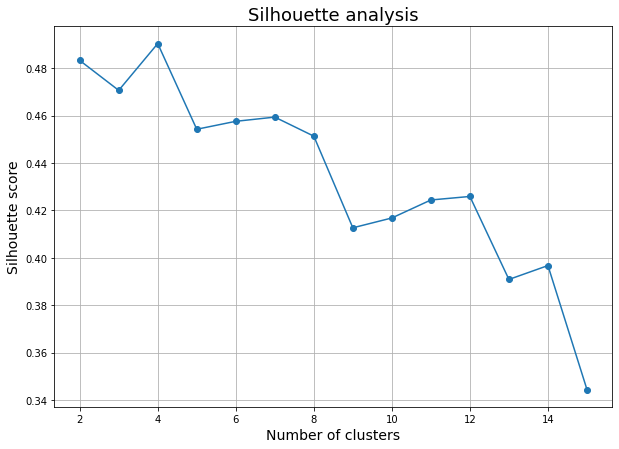

In [ ]:
from sklearn.metrics import silhouette_score

clusters_range = list(np.arange(2,16)) # different cluster range from 2 to 15
silhouette_avg = [] # for storing the Silhouette score
for c in clusters_range:

  kmeans=KMeans(init='k-means++',n_clusters=c,n_init=20, max_iter=500,random_state=123).fit(X) # initializing and fitting the model
  cluster_labels = kmeans.labels_ # finding the assinged labels
 
 # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels)) # appending the Silhouette score

for i in range(len(silhouette_avg)):
  print(f"Clusters : {clusters_range[i]}   Silhouette score : {silhouette_avg[i]}")
print()

# plotting the Silhouette score to find the optimum number of clusters
plt.figure(figsize=(10,7))
plt.plot(clusters_range,silhouette_avg,marker='o')
plt.xlabel('Number of clusters',fontsize="14")
plt.ylabel('Silhouette score',fontsize="14") 
plt.title('Silhouette analysis',fontsize="18")
plt.grid(True)
plt.show()

We see that the silhouette score is maximized at k = 4. So **4 CLUSTERS** is a good value of number of clusters.

So we can take **5 clusters** as optimum value based on ELBOW method.

### Clustering using optimum K

In [ ]:
model = KMeans(n_clusters = 5, init = 'k-means++', n_init=100,random_state=42)
labels = model.fit_predict(X) # predicted cluster labels
print(labels)


[3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3
 3 3 3 3 3 0 3 3 3 0 3 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 2 0 0 0 4 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0
 0 0 0 0 0 0 0 4 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 4 4 1 1 1 4 1
 2 1 1 4 1 1 4 2 1 4 4 1 1 4 4 1 1 4 1 4 1 1 4 1 1 1 1 1 4 4 4 4 4 1 1 4 4
 4 1 1 4 2 2 2 2 2 4 2 2 2 4 2 2 4 4 2 2 4 4 4 2 2 2 4 4 4 2 4 4 4 2 4 2 2
 2 2 2 4 4 2 2 2 2 4 2 4 2 4 2 4 4 4 2 2 2 2 2 2 2 2 2 4 2 4 4 4 4 2 2 2 2
 2 4 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4]


Let's create a dataframe having the original dataset along with their predicted labels

In [ ]:
output_df = pd.DataFrame(X, columns=list(df.columns))
output_df

,x1,x2,x3,x4
0,0.394137,0.552636,0.048461,0.101559
1,0.607227,0.598356,0.043724,0.067448
2,0.466854,0.416411,0.069271,0.150071
3,0.485668,0.442824,0.067504,0.100287
4,0.499257,0.482481,0.040521,0.198586
...,...,...,...,...
346,0.078085,0.061217,0.195574,0.212692
347,0.090910,0.034783,0.027432,0.337638
348,0.023773,0.024867,0.047202,0.427267
349,0.031725,0.034559,0.059603,0.275295


In [ ]:
output_df["Cluster_Label"] = labels
output_df

,x1,x2,x3,x4,Cluster_Label
0,0.394137,0.552636,0.048461,0.101559,3
1,0.607227,0.598356,0.043724,0.067448,3
2,0.466854,0.416411,0.069271,0.150071,3
3,0.485668,0.442824,0.067504,0.100287,3
4,0.499257,0.482481,0.040521,0.198586,3
...,...,...,...,...,...
346,0.078085,0.061217,0.195574,0.212692,4
347,0.090910,0.034783,0.027432,0.337638,2
348,0.023773,0.024867,0.047202,0.427267,2
349,0.031725,0.034559,0.059603,0.275295,2


In [ ]:
# centers formed
centers = model.cluster_centers_
centers

array([[0.07179793, 0.46204224, 0.05505507, 0.11059164],
       [0.05220513, 0.03409584, 0.48819652, 0.10779575],
       [0.0436149 , 0.03828881, 0.06021678, 0.39621825],
       [0.52104425, 0.42902244, 0.06697897, 0.10403264],
       [0.05172595, 0.04771291, 0.08325355, 0.13063235]])

In [ ]:
# We can easily check the centroid values by averaging the features in each cluster.
output_df.groupby('Cluster_Label').mean()

,x1,x2,x3,x4
Cluster_Label,,,,
0,0.071798,0.462042,0.055055,0.110592
1,0.052205,0.034096,0.488197,0.107796
2,0.043615,0.038289,0.060217,0.396218
3,0.521044,0.429022,0.066979,0.104033
4,0.051726,0.047713,0.083254,0.130632


## Visualizing TSNE

https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html#:~:text=T%2Ddistributed%20Stochastic%20Neighbor%20Embedding,two%20or%20three%20dimensional%20space.

In [ ]:
from sklearn.manifold import TSNE

x = X
y = np.array(labels)
x.shape,y.shape

((351, 4), (351,))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.002s...
[t-SNE] Computed neighbors for 351 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 0.053145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.747498
[t-SNE] KL divergence after 1000 iterations: 0.252883


[Text(0.5, 1.0, 'T-SNE projection')]

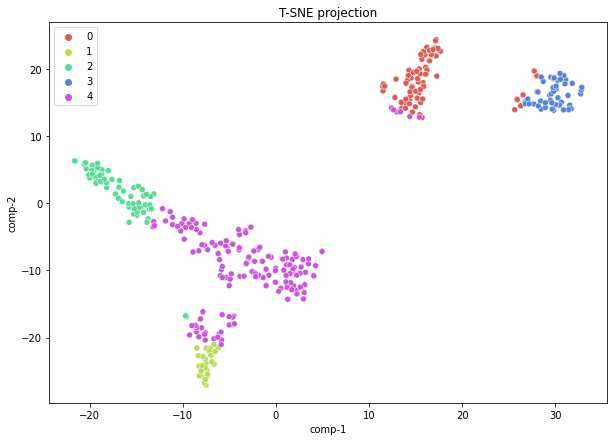

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title="T-SNE projection") 